# Vizualizace

## Modul `matplotlib`


In [ ]:
# !pip install matplotlib # Instalace pro Windows

# !pip3 install matplotlib # Instalace pro Mac OS nebo Linux

## První graf

* Importujeme si objekt pyplot z knihovny `matplotlib` a pojmenujeme si ho jako `plt`.
* Použijeme funkci `pandas.read_csv()`, kterou si necháme data stáhnout rovnou z internetu.
* Protože `CSV` soubor nemá hlavičku, musíme si sloupce sami pojmenovat a určit, který bude `DataFrame index`.
* Necháme si `DataFrame` vykreslit do podoby grafu.
* Obrázek s grafem si zobrazíme.

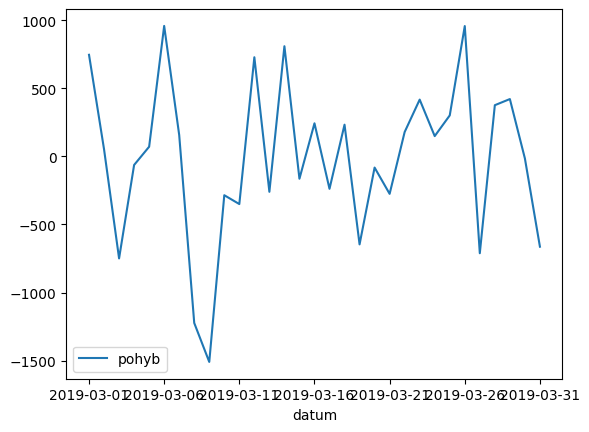

In [1]:
import pandas
import matplotlib.pyplot as plt

url = "https://kodim.cz/cms/assets/kurzy/python-data-1/python-pro-data-1/vizualizace/ucet.csv"
ucet = pandas.read_csv(url, names=['datum', 'pohyb'], index_col='datum')

ucet.plot()
plt.show()

Graf zůstatků na účtě.

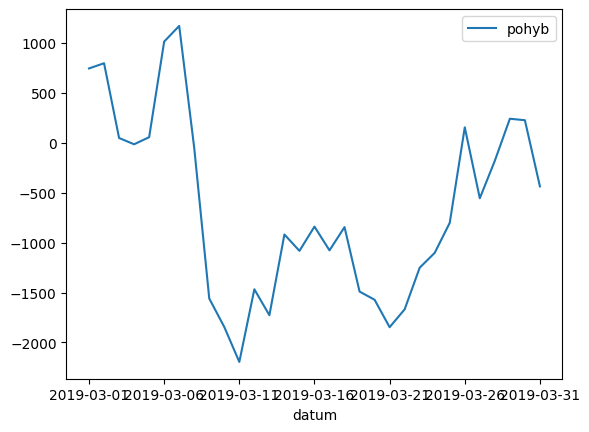

In [2]:
ucet.cumsum().plot() # kumulativní suma

plt.show()

## Možnosti formátování

Dokumentace: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html

Tutoriál: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


Vyrobíme z pohybů na účtu sloupcový graf s mřížkou ve žluté barvě.

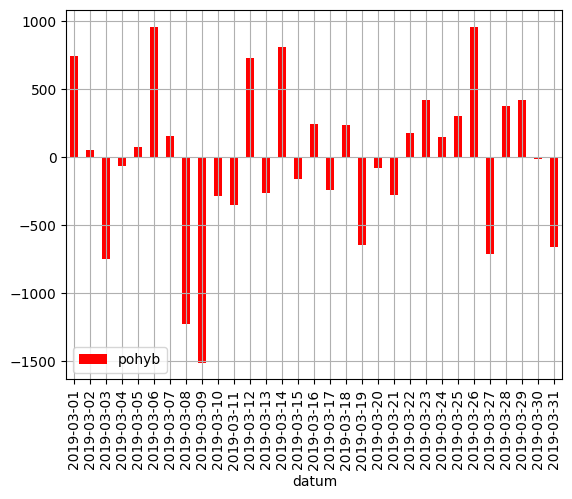

In [3]:
ucet.plot(
        kind='bar', 
        color='red', 
        grid=True
        )

plt.show()

### Barvy

<https://matplotlib.org/stable/tutorials/colors/colors.html>

In [4]:
color = "peachpuff" # a named color
color = "#0f0f0f" # RGB hex string
color = (0.1, 0.2, 0.5) # RGB
color = '0' # greyscale, black = 0, white = 1
color = "b" # blue, k = black
color= "C4" # Cn notation
color = "xkcd:crimson" # a named xkcd color --> https://blog.xkcd.com/2010/05/03/color-survey-results/

color

'xkcd:crimson'

### Podmíněné formatovaní

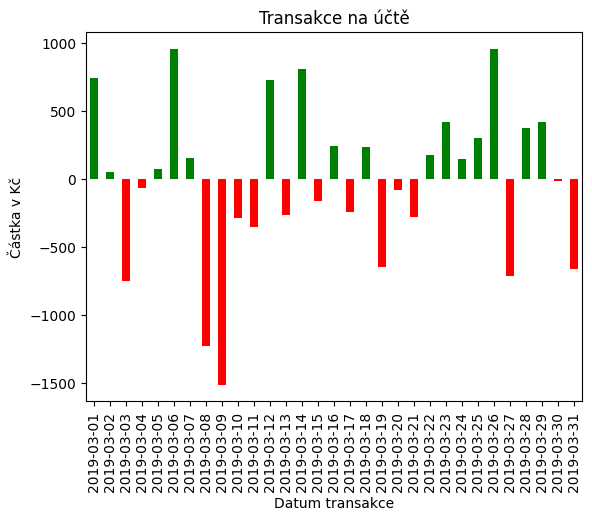

In [5]:
color = ["red" if value < 0 else "green" for value in ucet["pohyb"]]

ucet["pohyb"].plot(kind = 'bar',
        color = color, 
        width = 0.5,

        ## Popisky
        ylabel = "Částka v Kč",
        xlabel = "Datum transakce",
        title = "Transakce na účtě"
        )

plt.show()

### plt.figure()

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


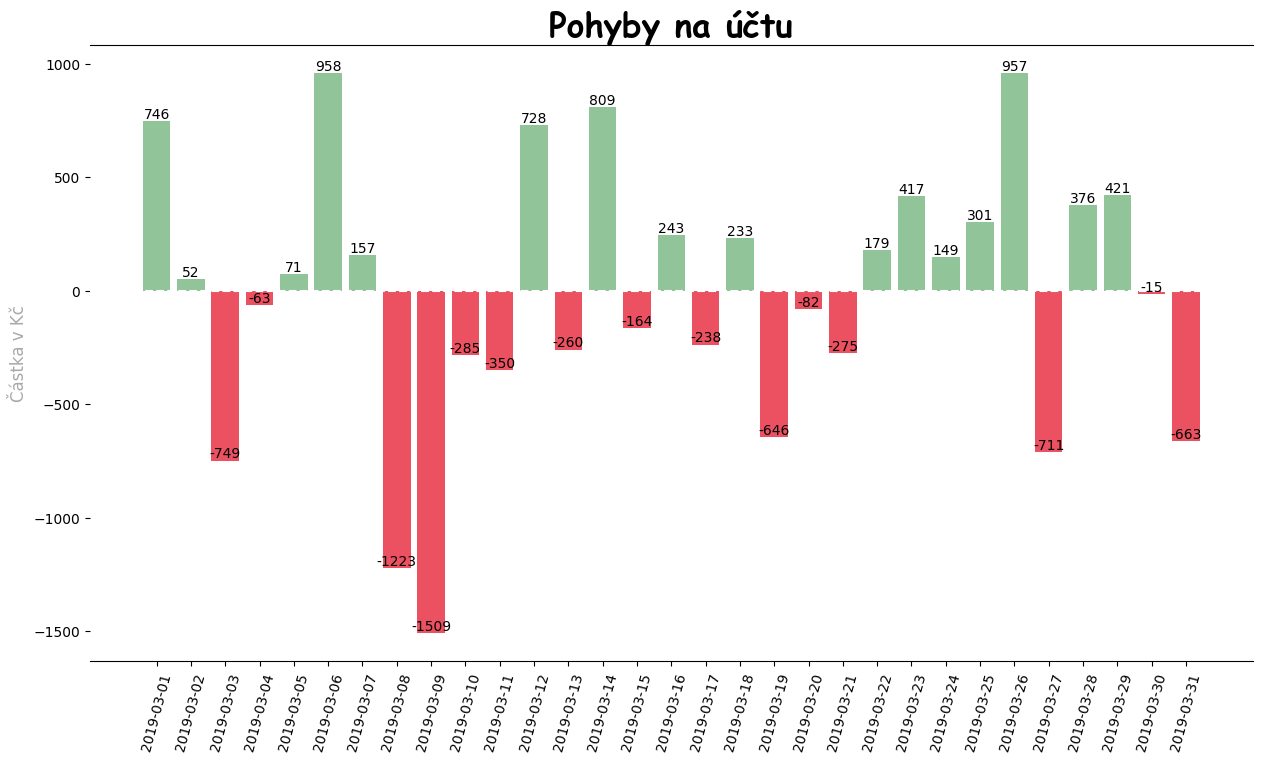

In [6]:
color = ["#EB5160" if value < 0 else "#91C499" for value in ucet["pohyb"]]

fig, ax = plt.subplots(figsize=(15,8))
print(type(fig))
print(type(ax))


ax.set_title("Pohyby na účtu", font = "Comic Sans MS", fontweight="bold", fontsize = 24)
ax.tick_params(axis="x", labelrotation=75)
ax.set_ylabel("Částka v Kč", color="darkgrey", fontsize = 12)
ax.bar(ucet.index, ucet.pohyb, color = color)
plt.axhline(y=0, color="white", linestyle="--")

## Popisky hodnot v grafu
for i in range(len(ucet.pohyb)):
    plt.annotate(str(ucet.pohyb[i]), 
                xy=(ucet.index[i],
                ucet.pohyb[i]), 
                ha='center', 
                va='bottom')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

![matplotlib-anatomy](../img/anatomy.png)

### Style sheets

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

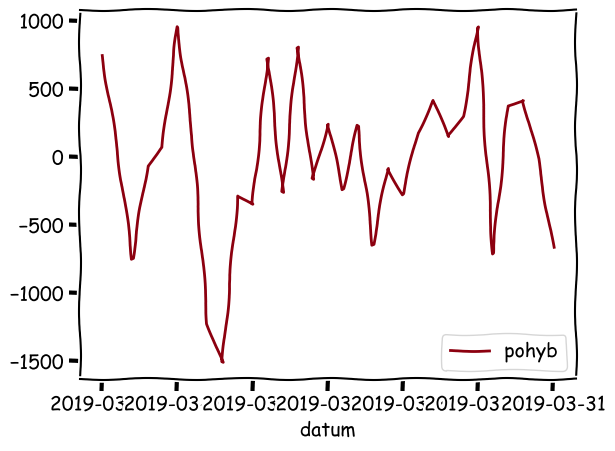

In [7]:
# https://matplotlib.org/stable/gallery/style_sheets/index.html
# https://towardsdatascience.com/how-to-create-and-use-custom-matplotlib-style-sheet-9393f498063

# plt.rcParams['figure.figsize'] = [15, 5]
# plt.style.use(['dark_background']) # default, grayscale

with plt.xkcd():
    ucet.plot(
        color="xkcd:crimson"
    )
plt.show()

## Typy grafů

Typ grafu se v metodě `plot` specifikuje pomocí argumentu `type`. 

Základní typy grafů, které se hojně používají mohou být například tyto:

* plot() - [Bodový graf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html),
* bar() - [Sloupcový graf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html),
* hist() - [Histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html),
* boxplot() - [Krabicový graf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html).


Výběr vhodného typu vizualizace se odvíjí od toho, jaká data zobrazujeme. 

Rady, jak vybrat vhodný typ vizualizace, najdete třeba v [tomto článku](https://blog.hubspot.com/marketing/types-of-graphs-for-data-visualization).


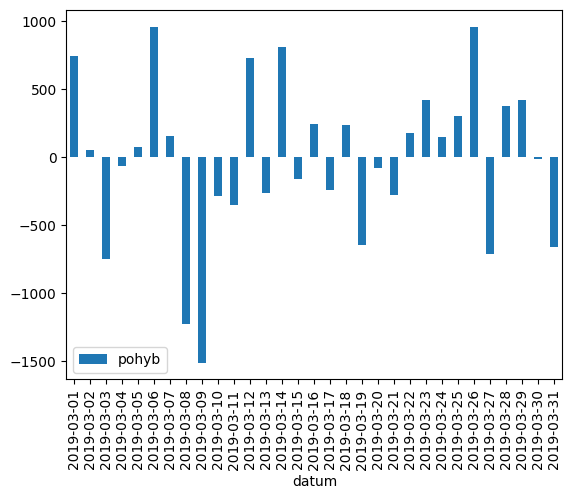

In [8]:
ucet.plot.bar()
plt.show()

### Histogramy

Zobrazuje četnost hodnot z nějakého datasetu.

In [9]:
# Následující seznam obsahuje výšku 64 náhodných mužů v České republice, měřeno v centimetrech.

muzi = pandas.Series([
  179.3, 183.7, 181.4, 176.0, 183.6, 184.7, 163.4, 180.3,
  167.5, 166.8, 173.5, 172.5, 173.0, 177.6, 176.0, 179.5,
  182.6, 172.0, 183.2, 177.0, 176.2, 175.7, 174.3, 180.3,
  184.9, 171.1, 182.3, 169.7, 181.3, 188.8, 176.8, 159.0,
  180.3, 198.5, 185.8, 191.0, 170.9, 196.0, 183.3, 183.0,
  189.9, 184.8, 184.0, 183.1, 184.0, 190.7, 191.7, 187.8,
  177.5, 177.5, 189.2, 188.4, 195.0, 204.2, 180.2, 181.3,
  178.2, 182.6, 172.1, 175.7, 180.7, 181.2, 165.0, 188.6
])

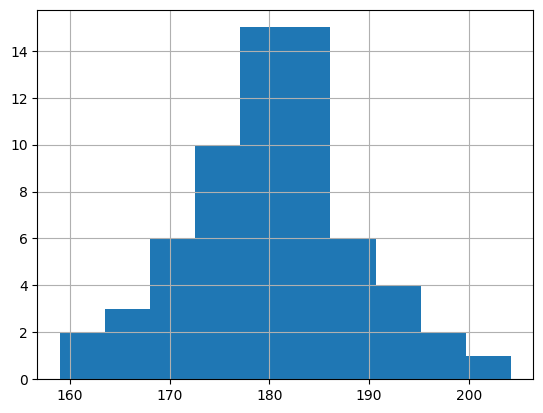

In [10]:
muzi.hist()
plt.show()

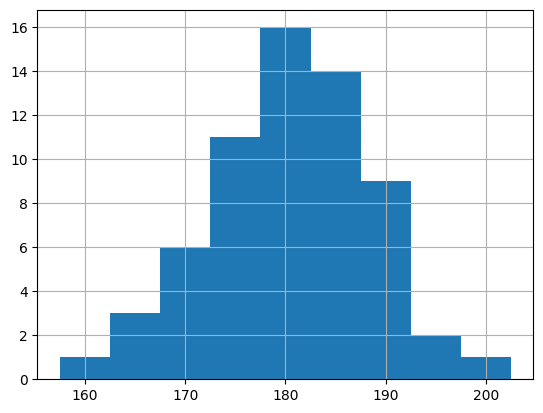

In [14]:
## Rozdělení po 5 centimetrech

muzi.hist(bins=[
  157.5, 162.5, 167.5, 172.5, 177.5, 182.5, 187.5, 192.5, 197.5, 202.5
])

plt.show()

### Krabicový graf

Krabicový graf graficky znázorňuje medián a kvartily naměřených hodnot. 


![Box plot explained](../img/boxplot-example.png)


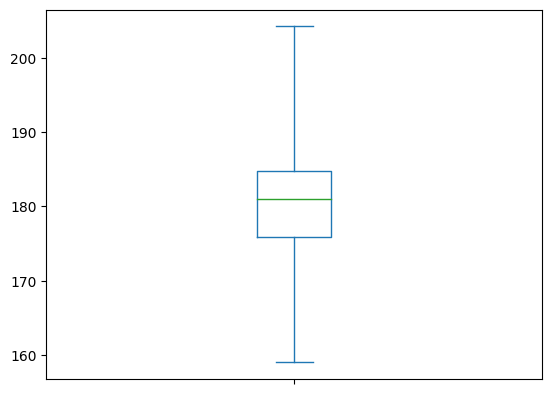

In [15]:
muzi.plot(
            kind='box', 
            whis=[0, 100] # whiskers: the vertical lines extending to the most extreme, non-outlier data points.
        )

plt.show()

## Další možnosti vytvoření grafu
# df.plot.box()
# df.boxplot()

Krabicové grafy jsou užitečné především pro porovnání dvou různých měření. 

Přidejme si druhou datovou sadu představující naměřené výšky žen.

In [16]:
zeny = pandas.Series([
  172.0, 169.0, 166.8, 164.6, 172.7, 171.5, 167.0, 167.0,
  168.3, 184.7, 166.0, 160.0, 168.8, 165.8, 173.5, 163.0,
  168.9, 158.4, 166.4, 169.4, 174.2, 175.6, 167.2, 168.0,
  171.5, 168.8, 168.9, 174.1, 169.0, 170.7, 156.3, 174.8,
  169.1, 161.4, 172.5, 166.1, 171.5, 163.9, 164.5, 169.0,
  168.5, 163.3, 169.5, 167.4, 175.5, 165.0, 166.6, 158.9,
  164.5, 168.7, 161.6, 175.8, 179.0, 167.9, 161.1, 167.6,
  165.9, 165.2, 176.0, 179.4, 160.1, 163.8, 177.7, 160.4
])

Vytvoříme DataFrame.

In [17]:
vysky = muzi.to_frame(name='muži')
vysky['ženy'] = zeny

## Alternativní postup vytvoření dataframu
# vysky = pandas.DataFrame(columns = ["Muzi", "Zeny"])
# vysky["Muzi"] = muzi
# vysky["Zeny"] = zeny

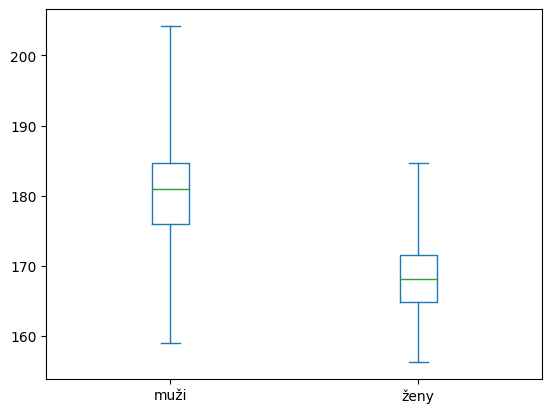

In [18]:
vysky.plot(kind='box', whis=[0, 100])


plt.show()

--- 

Více o boxplotu: <https://www.simplypsychology.org/boxplots.html>

Typické míry střední hodnoty jsou: 
- aritmetický průměr – průměr všech hodnot ve vzorku (počítáno podle hodnot), 
- medián – hodnota, které se nachází ve středu vzorku (počítáno podle pozic), a 
- modus – nejčastěji se vyskytující hodnota (počítáno podle frekvencí).

Typické míry rozptylu jsou: 
- kvartily – každá ze tří hodnot, které rozdělují tříděné údaje na čtyři stejné části tak, aby každá část představovala jednu čtvrtinu zkoumaného vzorku: 

- První kvartil (neboli dolní kvartil) odděluje nejnižších 25 % dat (25. percentil), 
- druhý kvartil (neboli střední) odděluje data v polovině (50. percentil), a 
- třetí kvartil (neboli horní kvartil) odděluje nejvyšších 25 % dat (75. percentil).

Typické míry extrémů jsou: 
- minimum – nejmenší číslo vzorku, a 
- maximum – největší číslo vzorku.